# Projet CMI405 - Romain DUPONT

### La fractale de Lichtenberg

Pour ce projet, je vais réaliser la fractale de Lichtenberg. Celle ci se produit naturellement lorsqu'une décharge électrostatique se produit dans l'air ou à l'intérieur d'un matériau isolant.

Voici un exemple de cette dernière : 

<center> <video controls src="Media/Exemple_Fractale.mp4" width="300" height="500" /> </center>

In [ ]:
#Ici se trouve tous les imports dont nous auront besoin.
from turtle import *
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
import os

### Turtle

J'ai commencé par utiliser le module Turtle de Python. Celui-ci nous permet de réaliser une variété de dessins, cependant nous nous appercevons très vite ses limites.

In [ ]:
def arbre(taille, n):

    if n == 0:
        return
    
    # On change la couleur de la Turtle suivant la profondeur de notre arbre.
    # Cela nous permet de distinguer les feuilles de celui-ci.
    colormode(255)
    pencolor(0, 0, 255//n)
    
    forward(taille)
    right(angle)

    # Sous arbre droit
    arbre(0.8 * taille, n-1)

    pencolor(0, 0, 255//n)

    left(angle*2)

    # Sous arbre gauche
    arbre(0.8 * taille, n-1)

    pencolor(0, 0, 255//n)

    right(angle)
    forward(-taille)

In [ ]:
# Angle entre la la base de l'arbre et ses branches
angle = 30

# On se positionne pour regarder vers le haut
left(90)

speed('fastest')
clear()

start_time = time.time()
arbre(80, 14)
end_time = time.time()

execution_time = end_time-start_time
print(f"Execution time: {execution_time/60:.2f} minutes")
#28:50 minutes pour n = 14 !
mainloop()

#### Résultat de notre algorithme

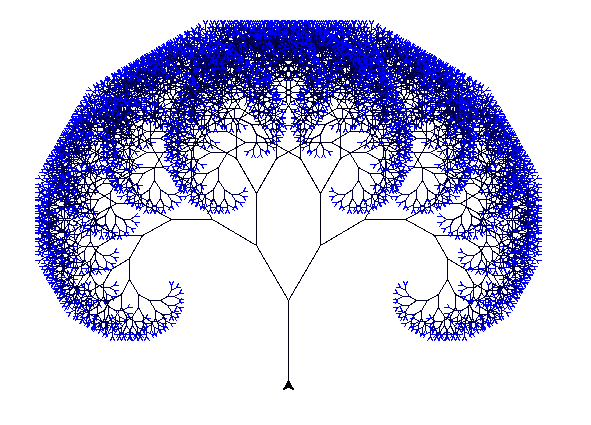

Cela pourrait nous convenir, cependant on observe que notre résultat n'est pas tout du tout ce qu'on attendait. Alors, certe nous avons les limitation de turtle qui nous produit quelque chose de simpliste, mais on observe que cela est BIEN différent de notre arbre de Lichtenberg. Le problème viendrait donc de l'algorithme ?

Pourtant il s'agit du premier code que l'on peut trouver lorsque l'on cherche **"Lichtenberg tree in python"** sur Google. (Source du code : [ici](https://www.geeksforgeeks.org/y-fractal-tree-in-python-using-turtle/))

Nous allons donc modifier notre algorithme pour rendre celui-ci un peu plus aléatoire.

In [ ]:
def arbreAlea(taille, n):

    if n == 0:
        end_time = time.time()
        return
    
    # On change la couleur de la Turtle suivant la profondeur de notre arbre.
    # Cela nous permet de distinguer les feuilles de celui-ci.
    colormode(255)
    pencolor(0, 0, 255//n)
    
    # On choisit un angle aléatoire compris entre 20° et 40°.
    angle = random.uniform(20, 40)
    
    # On change la taille de la branche entre 70% et 90% de sa taille actuelle.
    taille *= random.uniform(0.7, 0.9)
    
    forward(taille)
    right(angle)

    # Sous arbre droit
    arbreAlea(taille, n-1)

    pencolor(0, 0, 255//n)

    left(angle*2)

    # Sous arbre gauche
    arbreAlea(taille, n-1)

    pencolor(0,0, 255//n)

    right(angle)
    forward(-taille)

In [ ]:
# On se positionne pour regarder vers le haut
left(90)

speed('fastest')
clear()

start_time = time.time()
arbreAlea(80, 14)
end_time = time.time()

execution_time = end_time-start_time
print(f"Execution time: {execution_time/60:.2f} minutes")
mainloop()

### Résultat de notre algorithme

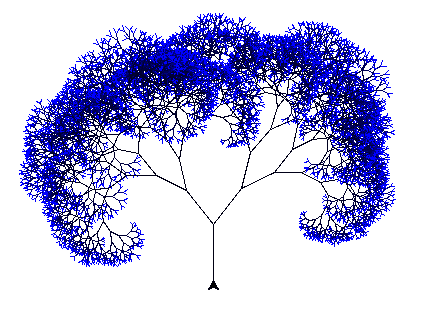

Ici nous obtenons un résultat un peu plus satisfaisant, malheureusement ce n'est toujours pas ce que l'on attendait...

On peut representer de beaux arbres grâce à cet algorithme mais après des recherches plus approfondies, j'ai appris ce qu'était réellement les fractales de Lichtenberg.

En effet je suis tombé sur ce [post](https://stackoverflow.com/questions/31375025/how-would-one-begin-to-write-code-to-generate-lichtenberg-figures-lightning-fra) sur StackOverflow.

On parlera alors de : **Diffusion Limited Aggregation (ou DLA)**

Voici un exemple de ces DLA :

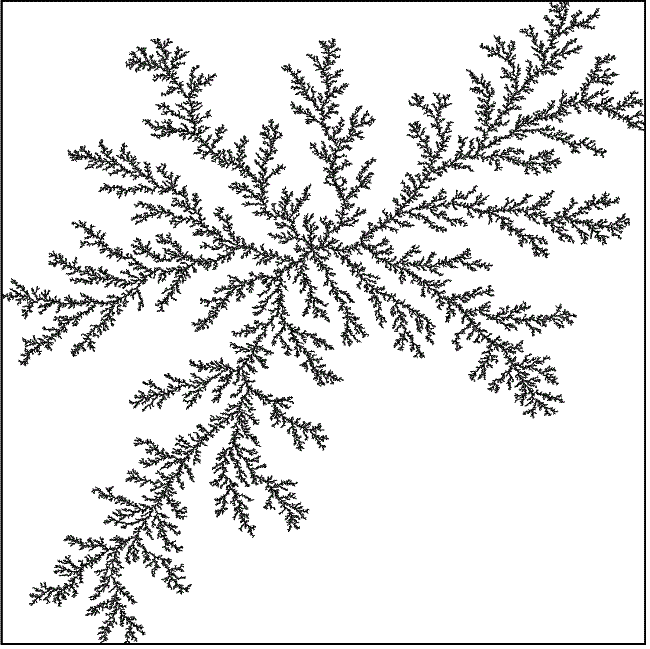

Cela ressemble déjà beaucoup plus à ce que l'on cherche faire !

Mais qu'est ce donc ces DLA ? D'après ce [lien](https://en.wikipedia.org/wiki/Diffusion-limited_aggregation) La diffusion limitée par agrégation est le phénomène par lequel des particules se baladant au hasard forme des "clusters" qui eux-même forment des agrégats de ces particules.

Bien évidemment cela est beaucoup plus compliqué que cela, mais c'est le principe derrière. Je ne préfère pas m'aventurer dans les détails car cela dépasse mes connaissances et compétences.

Maintenant il s'agirait d'implémenter ces DLA en python. Pour cela je vais avoir besoin d'un algorithme, voici celui avec lequel je suis venu après plusieurs heures de recherches : 

<ol>
    <li> Une particule initiale est placée au centre d'un rectangle de lancement de taille m*m. Ce rectangle est lui même contenue dans une zone de taille n*n, où n > m</li>
    <li> Une par une, des particules sont lâchées au hasard dans notre rectangle m*m, celles ci vont commencer leur mouvement brownien (ou marche aléatoire) </li>
    <li> Si une particule entre en contact avec une autre, celles-ci se joignent créant ainsi un cluster</li>
    <li> Si une particule s'aventure trop loin et atteint limite de notre rectangle de taille n*n, alors elle est retirée et une nouvelle particule est lancée dans le rectangle de lancement.</li>
</ol>

Voici les principales sources qui m'ont aidé dans le développement de cet algorithme :

[Diffusion Limited Aggregation par André Offringa](https://www.astro.rug.nl/~offringa/Diffusion%20Limited%20Aggregation.pdf)

[Implémentation des DLA en C++ par Michael Fogleman](https://github.com/fogleman/dlaf)

In [ ]:
def ma_DLA_trop_cool(nb_particules, N = 400):
    """Représente une DLA sous forme d'une matrice. 
        Nous pouvons ensuite utiliser cette matrice pour la représenter de 
        différentes façons."""
    M = int(N * 0.8) # Taille de notre rectangle m*m de lancement

    DLA = np.zeros((N, N)) #Matrice contenant nos particules

    lanc_x_start = lanc_y_start = (N-M) // 2
    lanc_x_end = lanc_y_end = (N-M)//2 + M - 1

    #Centre de notre rectangle de lancement
    cent_y = cent_x = N // 2
    DLA[cent_y, cent_x] = 1
    
    struc_l = [0, 1] #Taille de notre structure 
    struc_x_start = struc_x_end = cent_x

    #On ajoute notre première particule
    particule_ttl = 1

    while particule_ttl < nb_particules:

        #On lance notre particule aléatoire !
        walker_x = random.randint(lanc_x_start, lanc_x_end)
        walker_y = random.randint(lanc_y_start, lanc_y_end)

        found = False
        au_bord = False

        while not found and not au_bord:
            
            #On vérifie si notre particule aléatoire est au bord. 
            if walker_x == 0 or walker_x == N-1 or walker_y == 0 or walker_y == N-1:
                au_bord = True
                    
            #On vérifie si la particule possède un voisin ! 
            if not au_bord:
                # Voisin gauche
                if DLA[walker_y, walker_x-1] == 1:
                    found = True
                    DLA[walker_y, walker_x] = 1
                    particule_ttl += 1

                    if walker_x > struc_x_end:
                        struc_x_end = walker_x

                # Voisin droit
                elif DLA[walker_y, walker_x+1] == 1:
                    found = True
                    DLA[walker_y, walker_x] = 1
                    particule_ttl += 1

                    if walker_x < struc_x_start:
                        struc_x_start = walker_x


                # Voisin du haut
                elif DLA[walker_y-1, walker_x] == 1:
                    found = True
                    DLA[walker_y, walker_x] = 1
                    particule_ttl += 1

                # Voisin du bas
                elif DLA[walker_y+1, walker_x] == 1:
                    found = True
                    DLA[walker_y, walker_x] = 1
                    particule_ttl += 1
                    
            #Notre marche aléatoire (ou mouvement Brownien)
            if not found and not au_bord:
                rand = random.randint(1, 4)
                
                if rand == 1:
                    walker_x -= 1
                
                if rand == 2:
                    walker_x += 1
                
                if rand == 3:
                    walker_y -= 1
                
                if rand == 4:
                    walker_y += 1
    return DLA

In [ ]:
#Plus il y a de particule, plus notre DLA s'étend.
#Cependant, plus le temps d'exécution augmente.
nb_particule = 20000
N = 300

img = Image.new("RGB", (N,N), (255,255,255))
pixel = img.load()

start = time.time()
maDLA = ma_DLA_trop_cool(nb_particule, N)
end = time.time()

print(f" Temps d'éxécution: {(end-start)/60:.2f} minutes")

for i in range(N):
    for j in range(N):
        if(maDLA[i,j] == 1.0):
            pixel[i,j] = (0,0,0)
        
img.save("maDLA.png")
img.show()

In [ ]:
img = Image.new("RGB", (N,N), (0,0,0))
pixel = img.load()


for i in range(N):
    for j in range(N):
        if(maDLA[i,j] == 1.0):
            pixel[i,j] = (255,255,255)
        
img.save("maDLA2.png")
img.show()

### Résultat de notre algorithme

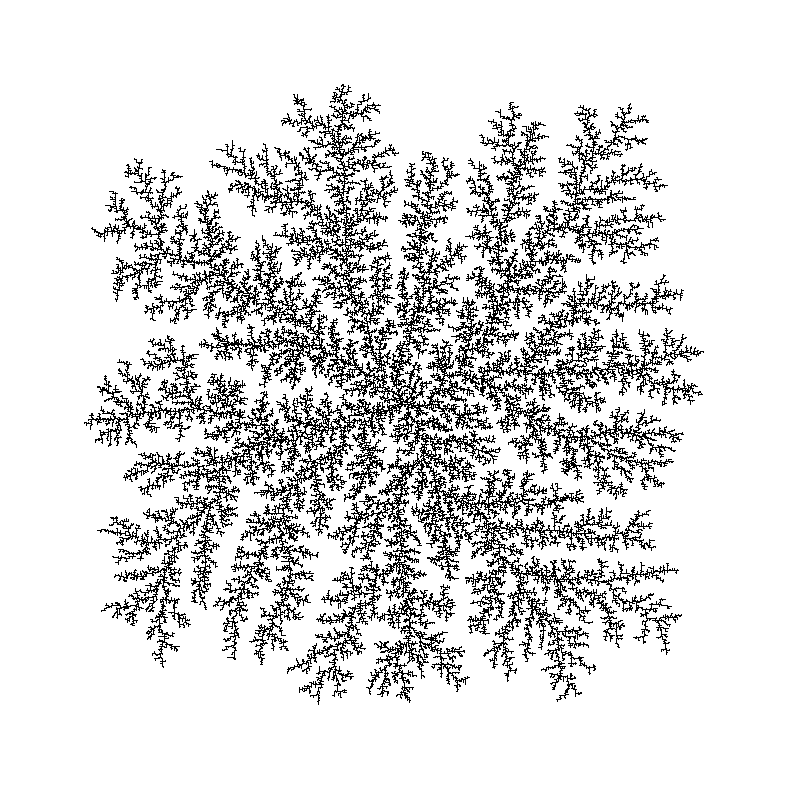

Bingo ! Cela ressemble déjà beaucoup plus à ce que l'on souhaitait au départ.

## Conclusion

Ce travail à nécessité beaucoup de recherche, j'ai d'ailleurs passé plus de temps à lire des papiers de physique sur les DLA qu'à coder. Mais cela fait partie du jeu, et je suis content d'être parvenu à un résultat qui me satisfait. 

De plus j'ai appris beaucoup de chose sur les DLA, je ne pensais que ce genre de phénomène existait dans la nature et cela les rendent d'autant plus passionnant.

En conclusion, ce travail m'a permit d'apprendre beaucoup, que ce soit sur les fractales, python ou même la physique en général.